In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Duplicate key in file PosixPath('/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family : IPAexGothic')


In [35]:
train = pd.read_csv("train.tsv", sep="\t")
test = pd.read_csv("test.tsv", sep="\t")
sample = pd.read_csv("sample_submit.csv", header=None)

In [3]:
train.head()

,id,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [4]:
train.dtypes

id              int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [5]:
train.describe()

,id,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,8645.000000,8645.000000,8645.0,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.00000,8645.000000,8645.000000,8645.000000
mean,4323.000000,2.513592,0.0,6.573973,11.573626,0.027646,3.012724,0.683748,1.437594,0.489069,0.46900,0.643430,0.191172,143.794448
std,2495.740872,1.105477,0.0,3.428147,6.907822,0.163966,2.006370,0.465040,0.653859,0.197943,0.17676,0.196293,0.123191,133.797854
min,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.00000,0.000000,0.000000,1.000000
25%,2162.000000,2.000000,0.0,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.31820,0.490000,0.104500,31.000000
50%,4323.000000,3.000000,0.0,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.48480,0.650000,0.194000,109.000000
75%,6484.000000,3.000000,0.0,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.62120,0.810000,0.283600,211.000000
max,8645.000000,4.000000,0.0,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.00000,1.000000,0.850700,651.000000


In [6]:
train.iloc[:,4:].corr()

,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
mnth,1.000000,-0.011814,0.029806,0.012024,0.003573,-0.020662,0.260442,0.272676,0.188061,-0.155645,0.179273
hr,-0.011814,1.000000,-0.000929,-0.005618,0.003792,-0.016521,0.120548,0.116382,-0.251188,0.125153,0.407486
holiday,0.029806,-0.000929,1.000000,-0.076324,-0.247934,0.008001,-0.020059,-0.026915,-0.022895,0.000502,-0.022912
weekday,0.012024,-0.005618,-0.076324,1.000000,0.018572,0.027766,-0.038969,-0.042439,-0.051307,0.039586,-0.004321
workingday,0.003573,0.003792,-0.247934,0.018572,1.000000,0.068628,0.053405,0.052551,0.025305,0.010509,0.011704
weathersit,-0.020662,-0.016521,0.008001,0.027766,0.068628,1.000000,-0.092036,-0.096556,0.407634,0.048414,-0.143288
temp,0.260442,0.120548,-0.020059,-0.038969,0.053405,-0.092036,1.000000,0.992022,-0.039525,-0.005989,0.451233
atemp,0.272676,0.116382,-0.026915,-0.042439,0.052551,-0.096556,0.992022,1.000000,-0.023541,-0.046120,0.447029
hum,0.188061,-0.251188,-0.022895,-0.051307,0.025305,0.407634,-0.039525,-0.023541,1.000000,-0.263196,-0.288615
windspeed,-0.155645,0.125153,0.000502,0.039586,0.010509,0.048414,-0.005989,-0.046120,-0.263196,1.000000,0.085356


In [7]:
import seaborn as sns

<AxesSubplot:>

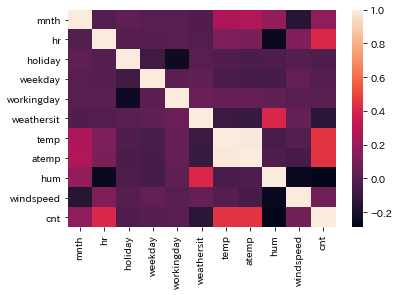

In [8]:
sns.heatmap(train.iloc[:,4:].corr())

In [10]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RF

from sklearn.model_selection import GridSearchCV
import pydotplus

In [13]:
train.columns

Index(['id', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       't'],
      dtype='object')

In [14]:
train.shape

(8645, 16)

In [81]:
trainX = train.iloc[:, 2:14]
#trainX = train[['season', 'mnth', 'hr', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
#trainX = train[['season', 'mnth', 'hr', 'weathersit', 'temp', 'atemp', 'hum']]
y = train["cnt"]

In [82]:
rfr = RF()

In [83]:
parameters = {"n_estimators": list(range(80,120)), "max_depth": list(range(3,8))}

In [85]:
#gcv = GridSearchCV(rfr, parameters, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, return_train_score=True)
gcv = GridSearchCV(rfr, parameters, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1, return_train_score=True)
gcv.fit(trainX, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [80, 81, 82, 83, 84, 85, 86, 87, 88,
                                          89, 90, 91, 92, 93, 94, 95, 96, 97,
                                          98, 99, 100, 101, 102, 103, 104, 105,
                                          106, 107, 108, 109, ...]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [86]:
gcv.best_params_

{'max_depth': 7, 'n_estimators': 101}

In [87]:
pred_train = gcv.predict(trainX)

In [88]:
from sklearn.metrics import mean_squared_error as MSE
print("RMSE",MSE(train["cnt"],pred_train)**0.5)

RMSE 51.132761302614455


In [89]:
testX = test.iloc[:, 2:14]
#testX = test[['season', 'mnth', 'hr', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
#testX = test[['season', 'mnth', 'hr', 'weathersit', 'temp', 'atemp', 'hum']]

In [91]:
pred_test = gcv.predict(testX)

In [92]:
pred_test

array([36.93022599, 28.66122106, 19.59670559, ..., 63.51172985,
       37.89054412, 32.95600463])

In [93]:
sample[1] = pred_test

In [94]:
sample.to_csv("submit01.csv", header=None, index=None)

提出した結果は139とtrainとの結果と乖離が大きい

# Appendix

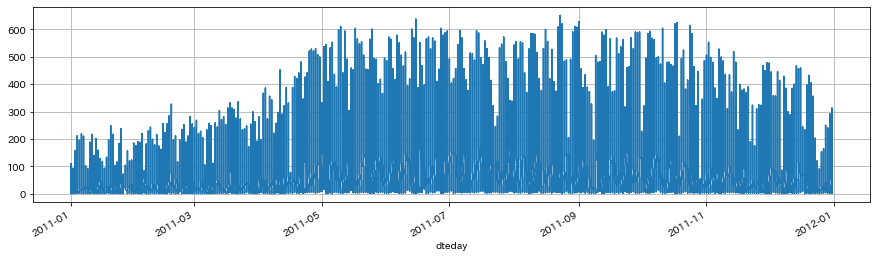

In [55]:
train.index = pd.to_datetime(train["dteday"])
train["cnt"].plot(figsize=(15,4),grid=True)
train = train.reset_index(drop=True)